In [20]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math
from scipy.io import wavfile
import scipy.fftpack

In [21]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [22]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [23]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [24]:
def samples_from_wav():
    rate,array=wavfile.read("fanfare3.wav")
    #print(rate)
    result=array[0:4100]
    return result    

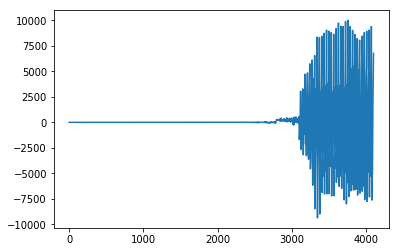

In [25]:
a = samples_from_wav()[:4100]
plt.plot(a)
plt.show()

In [26]:
def generalised_advanced_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=scipy.fftpack.fft(x)
    if transform_type==1:
        gtm=scipy.fftpack.dct(x,norm='ortho')
    if transform_type==2:
        gtm=haar(N)
        gtm=gtm*x
    return gtm   


In [27]:
def generalised_advanced_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=scipy.fftpack.ifft(X)
    if transform_type==1:
        igtm=scipy.fftpack.idct(X,norm='ortho')
    if transform_type==2:
        igtm=ihaar(N)
        igtm=igtm*X
    #print(igtm)
    return igtm

In [28]:
def mse_advanced(transform_type,x,X,N):
    error=[]
    fraction=100
    for l in range(0,N,fraction):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_advanced_inverse_transform(0,Xm)
            print(xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_advanced_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_advanced_inverse_transform(2,Xm)    
        #print(x.shape)
        #print(xm.shape)
        #print(np.dot(x,xm))
        y=xm-x
        error=np.append(error,np.dot(y,np.conjugate(y))/N)
    print(error)
    return error

[-9.79592342e-13-1.31322162e-13j -1.00000000e+00+9.58296857e-14j
  5.67879619e-13-7.00976404e-14j ...  4.61900000e+03-1.92837767e-12j
  5.31200000e+03-2.79472491e-12j  6.74500000e+03-4.86935780e-12j]
[  93.35389304-0.03528901j  -94.15558599+0.10667957j
   92.7753975 -0.17744409j ... 4526.14626606-0.1784458j
 5405.20270277+0.10769321j 6651.63038219-0.03630864j]
[ 186.72796421-0.0773109j  -186.16372817+0.21894811j
  182.16164138-0.35545336j ... 4436.32416644-0.34506036j
 5497.47524363+0.2080375j  6558.16769466-0.06613842j]
[ 280.13110852-0.12277068j -275.84885001+0.33319333j
  264.81197308-0.52608696j ... 4352.44301233-0.50187111j
 5587.91882747+0.30604126j 6464.50835996-0.09411084j]
[ 373.22547862-0.16910194j -361.79437285+0.44182042j
  337.43633234-0.67335806j ... 4277.73847427-0.63710608j
 5675.17689976+0.39673118j 6370.96548422-0.11937807j]
[ 466.22445461-0.20002673j -442.98593946+0.53483072j
  397.24682517-0.79208688j ... 4214.3204047 -0.77084499j
 5758.72077757+0.50383972j 6277.149

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


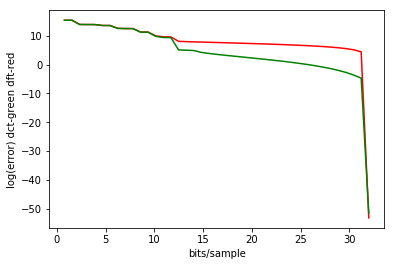

In [29]:
# input sequence generator

#real=np.random.rand(length)
#img=np.random.rand(length)
#x=real+1j*img
x=samples_from_wav()
N=x.shape[0]
b=32
color=['r',
       'g','b']
for i in range(0,2,1):
    X=generalised_advanced_transform(i,x)
    #print(X)
    err=mse_advanced(i,x,X,x.shape[0])
    err=np.log(err)
    print(err.shape)
    a=np.arange(0,x.shape[0],100)
    a=32*(N-a)/N
    plt.plot(a,err,color[i])
    plt.xlabel("bits/sample")
    plt.ylabel("log(error) dct-green dft-red")
    
plt.show()
#y=generalised_inverse_transform(0,X)

